In [73]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import seaborn as sns

In [74]:
my_data = pd.read_csv('C:/Users/inuhm/Bank marketing campaigns dataset analysis  Opening a Term Deposit/bank additional full.csv',encoding='ansi' )
my_data

age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       no      yes   
12      29    blue-collar    single          high.school       no       no   
13      57      housemaid  divorced             basic.4y       no      yes   
14      35    blue-collar   married             basic.6y       no      yes   
15      54        retired   married             basic.9y  unknown      yes   
16      35    blue-collar   married             basic.6y       no      yes   
17      46    blue-collar   married             basic.6y  unknown      yes   
18      50    blue-collar   married             basic.9y       no      yes   
19      39     management    single             basic.9y  unknown       no   
20      30     unemployed   married          high.school       no       no   
21      55    blue-collar   married             basic.4y  unknown      yes   
22      55        retired    single          high.school       no      yes   
23      41     technician    single          high.school       no      yes   
24      37         admin.   married          high.school       no      yes   
25      35     technician   married    university.degree       no       no   
26      59     technician   married              unknown       no      yes   
27      39  self-employed   married             basic.9y  unknown       no   
28      54     technician    single    university.degree  unknown       no   
29      55        unknown   married    university.degree  unknown  unknown   
...    ...            ...       ...                  ...      ...      ...   
41158   35     technician  divorced             basic.4y       no       no   
41159   35     technician  divorced             basic.4y       no      yes   
41160   33         admin.   married    university.degree       no       no   
41161   33         admin.   married    university.degree       no      yes   
41162   60    blue-collar   married             basic.4y       no      yes   
41163   35     technician  divorced             basic.4y       no      yes   
41164   54         admin.   married  professional.course       no       no   
41165   38      housemaid  divorced    university.degree       no       no   
41166   32         admin.   married    university.degree       no       no   
41167   32         admin.   married    university.degree       no      yes   
41168   38   entrepreneur   married    university.degree       no       no   
41169   62       services   married          high.school       no      yes   
41170   40     management  divorced    university.degree       no      yes   
41171   33        student   married  professional.course       no      yes   
41172   31         admin.    single    university.degree       no      yes   
41173   62        retired   married    university.degree       no      yes   
41174   62        retired   married    university.degree       no      yes   
41175   34        student    single              unknown       no      yes   
41176   38      housemaid  divorced          high.school       no      yes   
41177   57        retired   m

In [75]:
my_data.y.value_counts()


no     36548
yes     4640
Name: y, dtype: int64

In [76]:
my_data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [77]:
my_data.drop('poutcome',axis=1,inplace=True)

my_data

age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       no      yes   
12      29    blue-collar    single          high.school       no       no   
13      57      housemaid  divorced             basic.4y       no      yes   
14      35    blue-collar   married             basic.6y       no      yes   
15      54        retired   married             basic.9y  unknown      yes   
16      35    blue-collar   married             basic.6y       no      yes   
17      46    blue-collar   married             basic.6y  unknown      yes   
18      50    blue-collar   married             basic.9y       no      yes   
19      39     management    single             basic.9y  unknown       no   
20      30     unemployed   married          high.school       no       no   
21      55    blue-collar   married             basic.4y  unknown      yes   
22      55        retired    single          high.school       no      yes   
23      41     technician    single          high.school       no      yes   
24      37         admin.   married          high.school       no      yes   
25      35     technician   married    university.degree       no       no   
26      59     technician   married              unknown       no      yes   
27      39  self-employed   married             basic.9y  unknown       no   
28      54     technician    single    university.degree  unknown       no   
29      55        unknown   married    university.degree  unknown  unknown   
...    ...            ...       ...                  ...      ...      ...   
41158   35     technician  divorced             basic.4y       no       no   
41159   35     technician  divorced             basic.4y       no      yes   
41160   33         admin.   married    university.degree       no       no   
41161   33         admin.   married    university.degree       no      yes   
41162   60    blue-collar   married             basic.4y       no      yes   
41163   35     technician  divorced             basic.4y       no      yes   
41164   54         admin.   married  professional.course       no       no   
41165   38      housemaid  divorced    university.degree       no       no   
41166   32         admin.   married    university.degree       no       no   
41167   32         admin.   married    university.degree       no      yes   
41168   38   entrepreneur   married    university.degree       no       no   
41169   62       services   married          high.school       no      yes   
41170   40     management  divorced    university.degree       no      yes   
41171   33        student   married  professional.course       no      yes   
41172   31         admin.    single    university.degree       no      yes   
41173   62        retired   married    university.degree       no      yes   
41174   62        retired   married    university.degree       no      yes   
41175   34        student    single              unknown       no      yes   
41176   38      housemaid  divorced          high.school       no      yes   
41177   57        retired   m

In [78]:
my_data.replace('unknown',np.nan,inplace=True)
my_data.replace('no',0,inplace=True)
my_data.replace('yes',1,inplace=True)
my_data.dropna(axis=0,inplace=True)
my_data

age           job   marital            education  default  housing  \
0       56     housemaid   married             basic.4y      0.0      0.0   
2       37      services   married          high.school      0.0      1.0   
3       40        admin.   married             basic.6y      0.0      0.0   
4       56      services   married          high.school      0.0      0.0   
6       59        admin.   married  professional.course      0.0      0.0   
8       24    technician    single  professional.course      0.0      1.0   
9       25      services    single          high.school      0.0      1.0   
11      25      services    single          high.school      0.0      1.0   
12      29   blue-collar    single          high.school      0.0      0.0   
13      57     housemaid  divorced             basic.4y      0.0      1.0   
14      35   blue-collar   married             basic.6y      0.0      1.0   
16      35   blue-collar   married             basic.6y      0.0      1.0   
18      50   blue-collar   married             basic.9y      0.0      1.0   
20      30    unemployed   married          high.school      0.0      0.0   
22      55       retired    single          high.school      0.0      1.0   
23      41    technician    single          high.school      0.0      1.0   
24      37        admin.   married          high.school      0.0      1.0   
25      35    technician   married    university.degree      0.0      0.0   
34      54   blue-collar  divorced             basic.4y      0.0      0.0   
36      34      services   married          high.school      0.0      0.0   
37      52    technician   married             basic.9y      0.0      1.0   
38      41        admin.   married    university.degree      0.0      1.0   
39      56    technician   married             basic.4y      0.0      1.0   
41      32  entrepreneur   married          high.school      0.0      1.0   
42      38        admin.    single  professional.course      0.0      0.0   
43      57        admin.   married    university.degree      0.0      0.0   
46      57        admin.   married    university.degree      0.0      1.0   
47      40   blue-collar   married             basic.9y      0.0      0.0   
48      35        admin.   married    university.degree      0.0      1.0   
49      45   blue-collar   married             basic.9y      0.0      1.0   
...    ...           ...       ...                  ...      ...      ...   
41157   31     housemaid    single    university.degree      0.0      0.0   
41158   35    technician  divorced             basic.4y      0.0      0.0   
41159   35    technician  divorced             basic.4y      0.0      1.0   
41160   33        admin.   married    university.degree      0.0      0.0   
41161   33        admin.   married    university.degree      0.0      1.0   
41162   60   blue-collar   married             basic.4y      0.0      1.0   
41163   35    technician  divorced             basic.4y      0.0      1.0   
41164   54        admin.   married  professional.course      0.0      0.0   
41165   38     housemaid  divorced    university.degree      0.0      0.0   
41166   32        admin.   married    university.degree      0.0      0.0   
41167   32        admin.   married    university.degree      0.0      1.0   
41168   38  entrepreneur   married    university.degree      0.0      0.0   
41169   62      services   married          high.school      0.0      1.0   
41170   40    management  divorced    university.degree      0.0      1.0   
41171   33       student   married  professional.course      0.0      1.0   
41172   31        admin.    single    university.degree      0.0      1.0   
41173   62       retired   married    university.degree      0.0      1.0   
41174   62       retired   married    university.degree      0.0      1.0   
41176   38     housemaid  divorced          high.school      0.0      1.0   
41177   57       retired   married  professional.course      0.0      1.0   
411

In [79]:
le = preprocessing.LabelEncoder()
my_data['job']=le.fit_transform(my_data['job'])
my_data['marital']=le.fit_transform(my_data['marital'])
my_data['education']=le.fit_transform(my_data['education'])
my_data['contact']=le.fit_transform(my_data['contact'])
my_data['month']=le.fit_transform(my_data['month'])
my_data['day_of_week']=le.fit_transform(my_data['day_of_week'])

my_data

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0      0.0      0.0   0.0        1      6   
2       37    7        1          3      0.0      1.0   0.0        1      6   
3       40    0        1          1      0.0      0.0   0.0        1      6   
4       56    7        1          3      0.0      0.0   1.0        1      6   
6       59    0        1          5      0.0      0.0   0.0        1      6   
8       24    9        2          5      0.0      1.0   0.0        1      6   
9       25    7        2          3      0.0      1.0   0.0        1      6   
11      25    7        2          3      0.0      1.0   0.0        1      6   
12      29    1        2          3      0.0      0.0   1.0        1      6   
13      57    3        0          0      0.0      1.0   0.0        1      6   
14      35    1        1          1      0.0      1.0   0.0        1      6   
16      35    1        1          1      0.0      1.0   0.0        1      6   
18      50    1        1          2      0.0      1.0   1.0        1      6   
20      30   10        1          3      0.0      0.0   0.0        1      6   
22      55    5        2          3      0.0      1.0   0.0        1      6   
23      41    9        2          3      0.0      1.0   0.0        1      6   
24      37    0        1          3      0.0      1.0   0.0        1      6   
25      35    9        1          6      0.0      0.0   1.0        1      6   
34      54    1        0          0      0.0      0.0   0.0        1      6   
36      34    7        1          3      0.0      0.0   0.0        1      6   
37      52    9        1          2      0.0      1.0   0.0        1      6   
38      41    0        1          6      0.0      1.0   0.0        1      6   
39      56    9        1          0      0.0      1.0   0.0        1      6   
41      32    2        1          3      0.0      1.0   0.0        1      6   
42      38    0        2          5      0.0      0.0   0.0        1      6   
43      57    0        1          6      0.0      0.0   1.0        1      6   
46      57    0        1          6      0.0      1.0   1.0        1      6   
47      40    1        1          2      0.0      0.0   1.0        1      6   
48      35    0        1          6      0.0      1.0   0.0        1      6   
49      45    1        1          2      0.0      1.0   0.0        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41157   31    3        2          6      0.0      0.0   0.0        0      7   
41158   35    9        0          0      0.0      0.0   0.0        0      7   
41159   35    9        0          0      0.0      1.0   0.0        0      7   
41160   33    0        1          6      0.0      0.0   0.0        0      7   
41161   33    0        1          6      0.0      1.0   0.0        0      7   
41162   60    1        1          0      0.0      1.0   0.0        0      7   
41163   35    9        0          0      0.0      1.0   0.0        0      7   
41164   54    0        1          5      0.0      0.0   0.0        0      7   
41165   38    3        0          6      0.0      0.0   0.0        0      7   
41166   32    0        1          6      0.0      0.0   0.0        1      7   
41167   32    0        1          6      0.0      1.0   0.0        0      7   
41168   38    2        1          6      0.0      0.0   0.0        0      7   
41169   62    7        1          3      0.0      1.0   0.0        0      7   
41170   40    4        0          6      0.0      1.0   0.0        0      7   
41171   33    8        1          5      0.0      1.0   0.0        1      7   
41172   31    0        2          6      0.0      1.0   0.0        0      7   
41173   62    5        1          6      0.0      1.0   0.0        0      7   
41174   62    5        1          6      0.0      1.0   0.0        0      7   
41176   38    3        0          3      0.0      1.0   1

In [80]:
my_data.y.value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [81]:
eqalclassData =my_data.groupby('y').apply(lambda x: x.sample(n=5000,replace=True)).reset_index(drop = True)
eqalclassData

age  job  marital  education  default  housing  loan  contact  month  \
0      33   10        1          2      0.0      1.0   0.0        1      6   
1      32    0        2          3      0.0      0.0   0.0        0      7   
2      29    0        2          6      0.0      0.0   0.0        0      6   
3      22    4        2          6      0.0      1.0   0.0        0      0   
4      31   10        2          5      0.0      0.0   0.0        1      6   
5      29    0        2          6      0.0      0.0   1.0        0      1   
6      51    0        1          3      0.0      0.0   1.0        0      6   
7      31    1        1          1      0.0      0.0   0.0        0      1   
8      35   10        1          0      0.0      1.0   0.0        0      7   
9      33    1        1          0      0.0      1.0   0.0        1      3   
10     36    2        1          6      0.0      1.0   0.0        0      6   
11     32    1        1          3      0.0      0.0   0.0        0      3   
12     34    0        1          6      0.0      0.0   0.0        0      1   
13     38    9        1          6      0.0      1.0   0.0        0      1   
14     45    7        0          2      0.0      0.0   0.0        0      0   
15     51    7        0          3      0.0      0.0   0.0        0      7   
16     42    2        1          1      0.0      0.0   0.0        1      6   
17     38    2        1          1      0.0      0.0   1.0        1      4   
18     52    4        1          1      0.0      1.0   0.0        0      7   
19     31    4        1          6      0.0      0.0   0.0        0      1   
20     27    9        2          5      0.0      0.0   0.0        0      6   
21     33    9        1          5      0.0      1.0   0.0        0      7   
22     41    9        1          6      0.0      1.0   1.0        0      1   
23     38    0        2          6      0.0      1.0   1.0        0      1   
24     39    9        2          5      0.0      0.0   0.0        0      0   
25     30    1        1          2      0.0      1.0   0.0        1      4   
26     42    0        1          6      0.0      0.0   0.0        0      1   
27     31    9        2          5      0.0      1.0   0.0        0      1   
28     47    9        1          5      0.0      1.0   0.0        0      3   
29     53    1        0          0      0.0      0.0   0.0        0      3   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
9970   33    2        1          6      0.0      1.0   0.0        1      8   
9971   33    0        2          6      0.0      0.0   0.0        0      4   
9972   26    0        2          2      0.0      1.0   1.0        0      3   
9973   44    6        1          6      0.0      0.0   0.0        0      4   
9974   56    9        1          5      0.0      0.0   0.0        0      3   
9975   35    4        0          6      0.0      0.0   0.0        0      2   
9976   75    5        1          0      0.0      0.0   0.0        0      0   
9977   59    5        0          0      0.0      1.0   1.0        0      3   
9978   33    7        2          6      0.0      1.0   0.0        0      8   
9979   29    9        1          6      0.0      1.0   0.0        0      3   
9980   35    0        1          3      0.0      1.0   0.0        0      5   
9981   33    9        2          5      0.0      1.0   0.0        0      9   
9982   29    0        1          3      0.0      1.0   0.0        0      6   
9983   88    5        0          0      0.0      0.0   0.0        0      5   
9984   31    0        0          6      0.0      1.0   0.0        0      6   
9985   88    5        0          0      0.0      1.0   0.0        0      5   
9986   43    7        0          3      0.0      0.0   0.0        0      7   
9987   60    0        0          5      0.0      1.0   0.0        0      9   
9988   60    4        2          6      0.0      1.0   1.0        0      5   
9989   35    7        1     

In [82]:
DT_df=np.split(eqalclassData,[19],axis=1)
x=DT_df[0]
y=DT_df[1]
y

y
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
...   ...
9970  1.0
9971  1.0
9972  1.0
9973  1.0
9974  1.0
9975  1.0
9976  1.0
9977  1.0
9978  1.0
9979  1.0
9980  1.0
9981  1.0
9982  1.0
9983  1.0
9984  1.0
9985  1.0
9986  1.0
9987  1.0
9988  1.0
9989  1.0
9990  1.0
9991  1.0
9992  1.0
9993  1.0
9994  1.0
9995  1.0
9996  1.0
9997  1.0
9998  1.0
9999  1.0

[10000 rows x 1 columns]

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.60,random_state=4,stratify=y)
dtc_churn = DecisionTreeClassifier()
dtc_churn.fit(x_train,y_train)
predict_dtc = dtc_churn.predict(x_test)
metrics.accuracy_score(y_test,predict_dtc)

0.87283333333333335

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


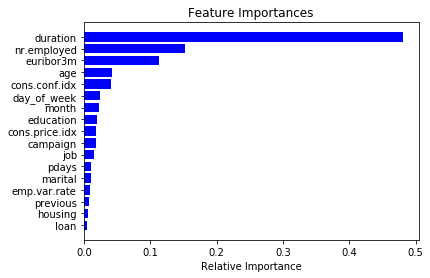

In [84]:
from sklearn.ensemble import RandomForestRegressor
randFmodel = RandomForestRegressor(random_state=1, max_depth=11)
randomFdata=pd.get_dummies(x)
randFmodel.fit(x,y)
featuresRandf = randomFdata.columns
importances = randFmodel.feature_importances_
indices = np.argsort(importances)[-17:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [featuresRandf[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
my_data=eqalclassData
my_data


age  job  marital  education  default  housing  loan  contact  month  \
0      33   10        1          2      0.0      1.0   0.0        1      6   
1      32    0        2          3      0.0      0.0   0.0        0      7   
2      29    0        2          6      0.0      0.0   0.0        0      6   
3      22    4        2          6      0.0      1.0   0.0        0      0   
4      31   10        2          5      0.0      0.0   0.0        1      6   
5      29    0        2          6      0.0      0.0   1.0        0      1   
6      51    0        1          3      0.0      0.0   1.0        0      6   
7      31    1        1          1      0.0      0.0   0.0        0      1   
8      35   10        1          0      0.0      1.0   0.0        0      7   
9      33    1        1          0      0.0      1.0   0.0        1      3   
10     36    2        1          6      0.0      1.0   0.0        0      6   
11     32    1        1          3      0.0      0.0   0.0        0      3   
12     34    0        1          6      0.0      0.0   0.0        0      1   
13     38    9        1          6      0.0      1.0   0.0        0      1   
14     45    7        0          2      0.0      0.0   0.0        0      0   
15     51    7        0          3      0.0      0.0   0.0        0      7   
16     42    2        1          1      0.0      0.0   0.0        1      6   
17     38    2        1          1      0.0      0.0   1.0        1      4   
18     52    4        1          1      0.0      1.0   0.0        0      7   
19     31    4        1          6      0.0      0.0   0.0        0      1   
20     27    9        2          5      0.0      0.0   0.0        0      6   
21     33    9        1          5      0.0      1.0   0.0        0      7   
22     41    9        1          6      0.0      1.0   1.0        0      1   
23     38    0        2          6      0.0      1.0   1.0        0      1   
24     39    9        2          5      0.0      0.0   0.0        0      0   
25     30    1        1          2      0.0      1.0   0.0        1      4   
26     42    0        1          6      0.0      0.0   0.0        0      1   
27     31    9        2          5      0.0      1.0   0.0        0      1   
28     47    9        1          5      0.0      1.0   0.0        0      3   
29     53    1        0          0      0.0      0.0   0.0        0      3   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
9970   33    2        1          6      0.0      1.0   0.0        1      8   
9971   33    0        2          6      0.0      0.0   0.0        0      4   
9972   26    0        2          2      0.0      1.0   1.0        0      3   
9973   44    6        1          6      0.0      0.0   0.0        0      4   
9974   56    9        1          5      0.0      0.0   0.0        0      3   
9975   35    4        0          6      0.0      0.0   0.0        0      2   
9976   75    5        1          0      0.0      0.0   0.0        0      0   
9977   59    5        0          0      0.0      1.0   1.0        0      3   
9978   33    7        2          6      0.0      1.0   0.0        0      8   
9979   29    9        1          6      0.0      1.0   0.0        0      3   
9980   35    0        1          3      0.0      1.0   0.0        0      5   
9981   33    9        2          5      0.0      1.0   0.0        0      9   
9982   29    0        1          3      0.0      1.0   0.0        0      6   
9983   88    5        0          0      0.0      0.0   0.0        0      5   
9984   31    0        0          6      0.0      1.0   0.0        0      6   
9985   88    5        0          0      0.0      1.0   0.0        0      5   
9986   43    7        0          3      0.0      0.0   0.0        0      7   
9987   60    0        0          5      0.0      1.0   0.0        0      9   
9988   60    4        2          6      0.0      1.0   1.0        0      5   
9989   35    7        1     

In [86]:
import scipy.io
from sklearn import manifold
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans
LLE = manifold.LocallyLinearEmbedding( n_components=2,n_neighbors=9)
LLE.fit(my_data)
manifold_2DaLLE = LLE.transform(my_data)
manifold_2DLLE = pd.DataFrame(manifold_2DaLLE, columns=['Componentlle 1', 'Componentlle 2'])

# Left with 2 dimensions
manifold_2DLLE.head()

Componentlle 1  Componentlle 2
0       -0.000319        0.000038
1        0.009592       -0.001305
2       -0.000017        0.000014
3        0.008490        0.014748
4       -0.000319        0.000057

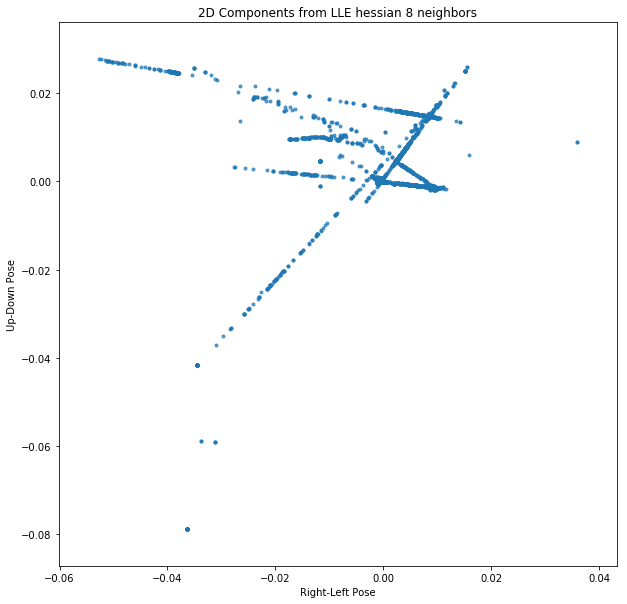

In [87]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from LLE hessian 8 neighbors')
ax.set_xlabel('Componentlle: 1')
ax.set_ylabel('Componentlle: 2')


# Show 2D components plot
ax.scatter(manifold_2DLLE['Componentlle 1'], manifold_2DLLE['Componentlle 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [88]:
#SpectralEmbedding implement
from sklearn.manifold import SpectralEmbedding
SE =manifold.SpectralEmbedding(n_components=2,n_neighbors=20)
SE.fit(my_data)
manifold_2DaSE = SE.fit_transform(my_data)
manifold_2DSE = pd.DataFrame(manifold_2DaSE, columns=['Componentse 1', 'Componentse 2'])

# Left with 2 dimensions
manifold_2DSE.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Componentse 1  Componentse 2
0      -0.032234   3.112878e-02
1      -0.052650  -4.289404e-02
2       0.059080  -7.661478e-12
3      -0.029011  -4.110840e-02
4      -0.039756   3.830703e-02

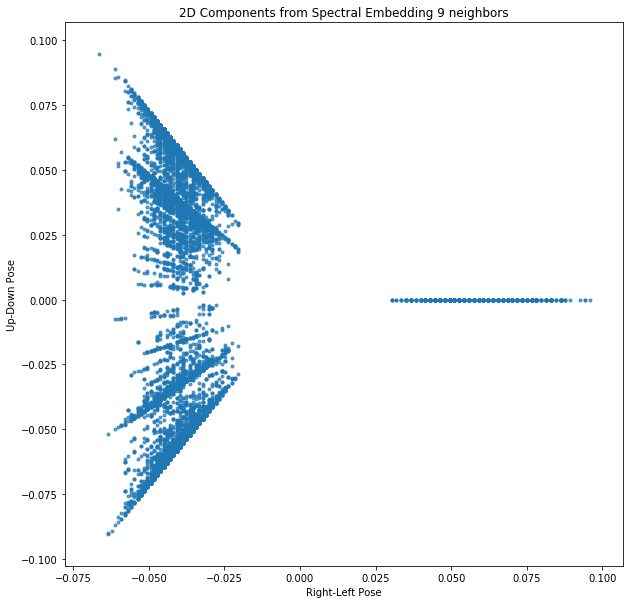

In [89]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Componentse: 1')
ax.set_ylabel('Componentse: 2')


# Show 2D components plot
ax.scatter(manifold_2DSE['Componentse 1'], manifold_2DSE['Componentse 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

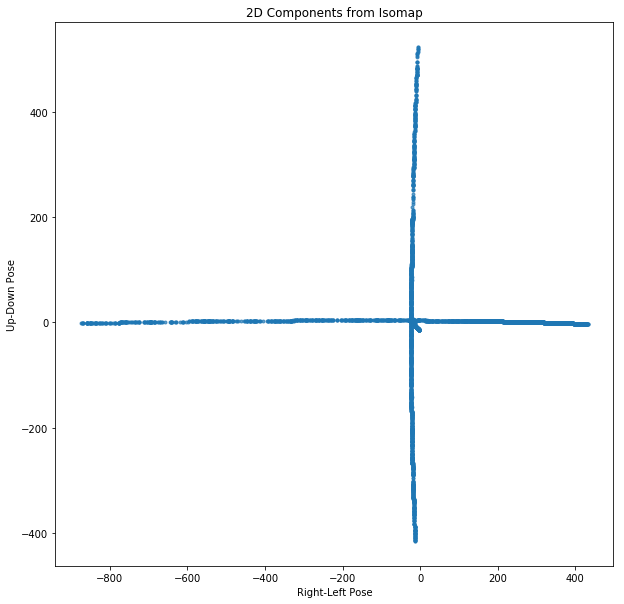

In [90]:
#isomap implement 
iso = manifold.Isomap(n_neighbors=4, n_components=2)
iso.fit(my_data)
manifold_2Da = iso.transform(my_data)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')


# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()


In [91]:
from sklearn.manifold import TSNE
TsneModel=  manifold.TSNE(n_components=2)
Manifold2dTSNE=TsneModel.fit_transform(my_data) 
Manifold2dTSNEdf = pd.DataFrame(Manifold2dTSNE, columns=['Component 1', 'Component 2'])

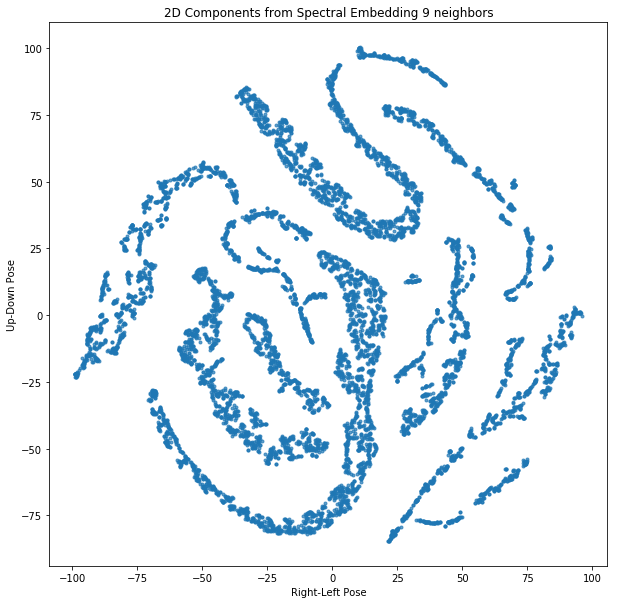

In [92]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')


# Show 2D components plot
ax.scatter(Manifold2dTSNEdf['Component 1'], Manifold2dTSNEdf['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

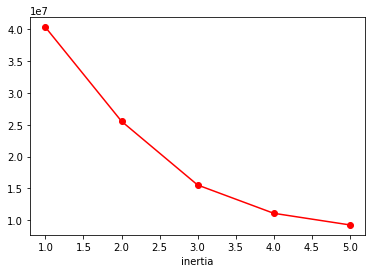

In [93]:
inertia_listtsne=[]
for k in np.arange(1,6):
    tsneinertia=KMeans(n_clusters=k)
    tsneinertia.fit(Manifold2dTSNEdf)
    inertia_listtsne.append(tsneinertia.inertia_)

plt.plot(np.arange(1,6), inertia_listtsne ,'ro-')
plt.xlabel("number of clusters")
plt.xlabel("inertia")
plt.show()


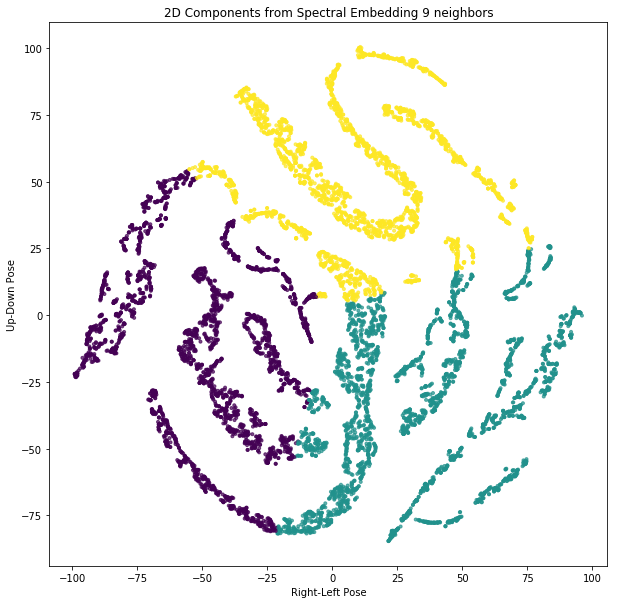

In [94]:
kmeansTSNE = KMeans(n_clusters=3, random_state=1)
kmeansTSNE.fit(Manifold2dTSNEdf)
labelTSNE=kmeansTSNE.predict(Manifold2dTSNEdf)#sthash.WiCJ4hD1.dpuf

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Spectral Embedding 9 neighbors')
ax.set_xlabel('Componentllecome: 1')
ax.set_ylabel('Componentllecome: 2')


# Show 2D components plot
ax.scatter(Manifold2dTSNEdf['Component 1'], Manifold2dTSNEdf['Component 2'], c=labelTSNE ,marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

In [95]:
my_data['cluster']=labelTSNE
my_data

age  job  marital  education  default  housing  loan  contact  month  \
0      33   10        1          2      0.0      1.0   0.0        1      6   
1      32    0        2          3      0.0      0.0   0.0        0      7   
2      29    0        2          6      0.0      0.0   0.0        0      6   
3      22    4        2          6      0.0      1.0   0.0        0      0   
4      31   10        2          5      0.0      0.0   0.0        1      6   
5      29    0        2          6      0.0      0.0   1.0        0      1   
6      51    0        1          3      0.0      0.0   1.0        0      6   
7      31    1        1          1      0.0      0.0   0.0        0      1   
8      35   10        1          0      0.0      1.0   0.0        0      7   
9      33    1        1          0      0.0      1.0   0.0        1      3   
10     36    2        1          6      0.0      1.0   0.0        0      6   
11     32    1        1          3      0.0      0.0   0.0        0      3   
12     34    0        1          6      0.0      0.0   0.0        0      1   
13     38    9        1          6      0.0      1.0   0.0        0      1   
14     45    7        0          2      0.0      0.0   0.0        0      0   
15     51    7        0          3      0.0      0.0   0.0        0      7   
16     42    2        1          1      0.0      0.0   0.0        1      6   
17     38    2        1          1      0.0      0.0   1.0        1      4   
18     52    4        1          1      0.0      1.0   0.0        0      7   
19     31    4        1          6      0.0      0.0   0.0        0      1   
20     27    9        2          5      0.0      0.0   0.0        0      6   
21     33    9        1          5      0.0      1.0   0.0        0      7   
22     41    9        1          6      0.0      1.0   1.0        0      1   
23     38    0        2          6      0.0      1.0   1.0        0      1   
24     39    9        2          5      0.0      0.0   0.0        0      0   
25     30    1        1          2      0.0      1.0   0.0        1      4   
26     42    0        1          6      0.0      0.0   0.0        0      1   
27     31    9        2          5      0.0      1.0   0.0        0      1   
28     47    9        1          5      0.0      1.0   0.0        0      3   
29     53    1        0          0      0.0      0.0   0.0        0      3   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
9970   33    2        1          6      0.0      1.0   0.0        1      8   
9971   33    0        2          6      0.0      0.0   0.0        0      4   
9972   26    0        2          2      0.0      1.0   1.0        0      3   
9973   44    6        1          6      0.0      0.0   0.0        0      4   
9974   56    9        1          5      0.0      0.0   0.0        0      3   
9975   35    4        0          6      0.0      0.0   0.0        0      2   
9976   75    5        1          0      0.0      0.0   0.0        0      0   
9977   59    5        0          0      0.0      1.0   1.0        0      3   
9978   33    7        2          6      0.0      1.0   0.0        0      8   
9979   29    9        1          6      0.0      1.0   0.0        0      3   
9980   35    0        1          3      0.0      1.0   0.0        0      5   
9981   33    9        2          5      0.0      1.0   0.0        0      9   
9982   29    0        1          3      0.0      1.0   0.0        0      6   
9983   88    5        0          0      0.0      0.0   0.0        0      5   
9984   31    0        0          6      0.0      1.0   0.0        0      6   
9985   88    5        0          0      0.0      1.0   0.0        0      5   
9986   43    7        0          3      0.0      0.0   0.0        0      7   
9987   60    0        0          5      0.0      1.0   0.0        0      9   
9988   60    4        2          6      0.0      1.0   1.0        0      5   
9989   35    7        1     

In [96]:

behavioralCluster1=my_data.loc[my_data['cluster'] ==0]
behavioralCluster2=my_data.loc[my_data['cluster'] ==1]
behavioralCluster3=my_data.loc[my_data['cluster'] ==2]
behavioralCluster1.drop('cluster',axis=1,inplace=True)
behavioralCluster2.drop('cluster',axis=1,inplace=True)
behavioralCluster3.drop('cluster',axis=1,inplace=True)
my_data.drop('cluster',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [97]:
behavioralCluster3

age  job  marital  education  default  housing  loan  contact  month  \
0      33   10        1          2      0.0      1.0   0.0        1      6   
4      31   10        2          5      0.0      0.0   0.0        1      6   
8      35   10        1          0      0.0      1.0   0.0        0      7   
12     34    0        1          6      0.0      0.0   0.0        0      1   
15     51    7        0          3      0.0      0.0   0.0        0      7   
16     42    2        1          1      0.0      0.0   0.0        1      6   
18     52    4        1          1      0.0      1.0   0.0        0      7   
21     33    9        1          5      0.0      1.0   0.0        0      7   
24     39    9        2          5      0.0      0.0   0.0        0      0   
26     42    0        1          6      0.0      0.0   0.0        0      1   
31     42    0        1          6      0.0      1.0   0.0        1      6   
32     47   10        1          3      0.0      0.0   0.0        0      7   
37     40    4        1          6      0.0      0.0   1.0        1      6   
38     52    4        0          6      0.0      0.0   0.0        1      4   
42     26    0        1          3      0.0      1.0   0.0        1      6   
45     46    1        1          3      0.0      1.0   0.0        0      6   
46     49    1        1          1      0.0      1.0   0.0        1      6   
47     39    3        1          0      0.0      1.0   0.0        1      6   
48     35    1        2          3      0.0      0.0   0.0        0      7   
51     24    7        2          3      0.0      0.0   0.0        0      3   
52     30    1        2          2      0.0      0.0   1.0        1      7   
54     53    1        1          2      0.0      1.0   0.0        0      3   
60     35    0        1          3      0.0      1.0   1.0        1      6   
63     53    0        1          3      0.0      0.0   0.0        0      7   
64     38    1        2          0      0.0      1.0   0.0        1      6   
67     55    9        1          3      0.0      0.0   0.0        1      6   
71     35    0        0          6      0.0      1.0   0.0        0      7   
75     50    2        1          2      0.0      1.0   0.0        1      6   
76     37    9        1          6      0.0      1.0   0.0        1      6   
77     50    9        1          5      0.0      1.0   1.0        1      4   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
9881   30    0        1          6      0.0      1.0   1.0        0      0   
9890   57    4        0          5      0.0      1.0   0.0        0      7   
9891   38    7        1          3      0.0      0.0   0.0        0      3   
9896   31    0        1          6      0.0      1.0   0.0        1      8   
9899   31    1        2          3      0.0      1.0   1.0        0      3   
9900   43    1        0          3      0.0      1.0   0.0        0      3   
9908   21    8        2          3      0.0      0.0   0.0        0      8   
9913   30    0        2          3      0.0      1.0   0.0        0      6   
9920   33    1        1          1      0.0      1.0   1.0        0      6   
9921   59    9        1          6      0.0      1.0   0.0        0      8   
9923   60    5        0          0      0.0      1.0   0.0        0      3   
9926   31    3        1          1      0.0      1.0   1.0        1      1   
9929   25    9        2          5      0.0      1.0   0.0        0      7   
9930   33    4        1          0      0.0      1.0   1.0        1      6   
9935   44    9        2          6      0.0      1.0   0.0        0      1   
9939   58    1        1          2      0.0      1.0   0.0        0      1   
9940   45    0        1          6      0.0      0.0   0.0        0      1   
9943   35    9        2          6      0.0      1.0   0.0        1      6   
9946   30    0        1          6      0.0      1.0   0.0        0      1   
9948   35    0        2     

In [98]:
#step 1 : accuracy for behavioural cluster 1 
Tempdf1=np.split(behavioralCluster1,[19],axis=1)
x_C1=Tempdf1[0]
y_C1=Tempdf1[1]

 
x_C1_train,x_C1_test,y_C1_train,y_C1_test =train_test_split(x_C1,y_C1,test_size=0.60,random_state=4,stratify=y_C1)
dtc_churn_C1 = DecisionTreeClassifier()
dtc_churn_C1.fit(x_C1_train,y_C1_train)
predict_dtc_C1 = dtc_churn_C1.predict(x_C1_test)
metrics.accuracy_score(y_C1_test,predict_dtc_C1)

0.83618090452261307

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


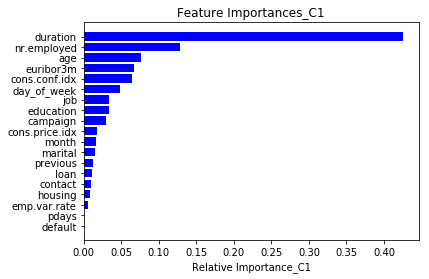

In [99]:
#step 2 : finding the main feature
randFmodel_C1 = RandomForestRegressor(random_state=1, max_depth=11)
randomFdata_C1=pd.get_dummies(x_C1)
randFmodel_C1.fit(x_C1,y_C1)
featuresRandf_C1 = randomFdata_C1.columns
importances_C1 = randFmodel_C1.feature_importances_
indices_C1 = np.argsort(importances_C1)[-19:]  # top 17 features


plt.title('Feature Importances_C1')
plt.barh(range(len(indices_C1)), importances_C1[indices_C1], color='b', align='center')
plt.yticks(range(len(indices_C1)), [featuresRandf_C1[i] for i in indices_C1])
plt.xlabel('Relative Importance_C1')
plt.show()


In [100]:
#step 3 : removing shado effect of main feature then calculate the accuracy on wrog data
y_C1_test['preds'] = predict_dtc_C1
MergedTempDf_C1 = pd.merge(y_C1_test,y_C1_test[['preds']],how = 'left',left_index = True, right_index = True)
WrongPredictedTempDf_C1=MergedTempDf_C1.loc[MergedTempDf_C1['y'] !=MergedTempDf_C1['preds_y']]
WrongPredictedTempDf_C1.drop('y',axis=1,inplace=True)
behavioralCluster1_Nonshadow = pd.concat([WrongPredictedTempDf_C1, behavioralCluster1], axis=1)
behavioralCluster1_Nonshadow.dropna(axis=0,inplace=True)
behavioralCluster1_Nonshadow.drop('preds_x',axis=1,inplace=True)
behavioralCluster1_Nonshadow.drop('preds_y',axis=1,inplace=True)
behavioralCluster1_Nonshadow.drop('duration',axis=1,inplace=True)

Tempdf1_1=np.split(behavioralCluster1_Nonshadow,[18],axis=1)
x_C1_1=Tempdf1_1[0]
y_C1_1=Tempdf1_1[1]

 
x_C1_1_train, x_C1_1_test, y_C1_1_train, y_C1_1_test =train_test_split(x_C1_1,y_C1_1,test_size=0.60,random_state=4,stratify=y_C1_1)

dtc_churn_C1_1 = DecisionTreeClassifier()
dtc_churn_C1_1.fit(x_C1_1_train, y_C1_1_train)
predict_dtc_C1_1 = dtc_churn_C1_1.predict(x_C1_1_test)
metrics.accuracy_score(y_C1_1_test, predict_dtc_C1_1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.55612244897959184

In [102]:
# in this step shadow effect evaluate in 2 section : 
# at the first section rendom forest classifire implement on hole data and just 1 behavioural cluster.
#then in different random state with low data changing the featurese impact stablity campares.
 

In [101]:
behavioralCluster1_Nonshadow

age  job  marital  education  default  housing  loan  contact  month  \
1      32    0        2          3      0.0      0.0   0.0        0      7   
56     30    9        0          3      0.0      0.0   0.0        0      1   
82     31    0        2          6      0.0      1.0   0.0        0      1   
89     55    1        1          0      0.0      1.0   1.0        0      1   
126    36    4        1          6      0.0      1.0   0.0        0      5   
142    24    9        2          5      0.0      0.0   0.0        0      4   
143    35    0        1          6      0.0      1.0   0.0        0      1   
211    32    9        1          6      0.0      0.0   0.0        1      9   
225    48    9        0          6      0.0      1.0   0.0        0      0   
273    21    7        2          3      0.0      0.0   0.0        0      4   
284    35    0        1          6      0.0      1.0   0.0        0      1   
306    33    9        2          3      0.0      1.0   0.0        0      1   
324    32    0        1          6      0.0      1.0   0.0        0      1   
423    47    1        1          2      0.0      1.0   0.0        0      1   
539    29    0        2          6      0.0      1.0   0.0        0      4   
603    38    9        2          6      0.0      1.0   0.0        0      4   
606    24    9        2          5      0.0      0.0   0.0        0      1   
636    47    0        2          6      0.0      1.0   1.0        0      6   
684    65    3        0          0      0.0      1.0   0.0        0      1   
687    78    5        1          5      0.0      1.0   0.0        0      7   
692    33    9        2          6      0.0      0.0   0.0        0      6   
697    45    6        2          2      0.0      1.0   0.0        0      0   
701    53    4        0          6      0.0      1.0   0.0        0      4   
711    37    0        2          3      0.0      0.0   1.0        0      7   
715    28    0        1          6      0.0      0.0   0.0        0      0   
753    40    0        1          3      0.0      1.0   0.0        1      1   
820    48    4        0          6      0.0      0.0   0.0        0      1   
844    24    7        2          2      0.0      1.0   0.0        0      3   
876    51    0        0          6      0.0      0.0   0.0        0      3   
932    30    6        2          6      0.0      1.0   1.0        0      4   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
8933   42    9        1          3      0.0      1.0   0.0        0      0   
8936   28    0        2          6      0.0      1.0   0.0        0      4   
8979   57    5        1          2      0.0      0.0   0.0        0      1   
9052   39    4        1          6      0.0      1.0   0.0        1      1   
9120   70    5        1          0      0.0      0.0   0.0        0      0   
9131   32    0        1          3      0.0      1.0   1.0        0      2   
9139   59    5        1          1      0.0      1.0   0.0        0      6   
9152   24    9        2          3      0.0      1.0   0.0        0      6   
9181   47    9        2          5      0.0      1.0   0.0        0      3   
9229   36    0        1          3      0.0      0.0   0.0        0      6   
9238   38    0        1          6      0.0      1.0   0.0        0      0   
9260   29    3        2          6      0.0      0.0   1.0        1      7   
9274   68    5        1          3      0.0      1.0   0.0        0      0   
9290   42    4        1          1      0.0      1.0   0.0        1      9   
9327   33    0        1          6      0.0      1.0   1.0        0      3   
9417   33    0        2          6      0.0      1.0   0.0        0      8   
9461   35    0        2          6      0.0      0.0   0.0        0      3   
9476   35    2        0          6      0.0      0.0   0.0        0      0   
9480   31    9        1          5      0.0      0.0   0.0        1      4   
9496   52    1        1     

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


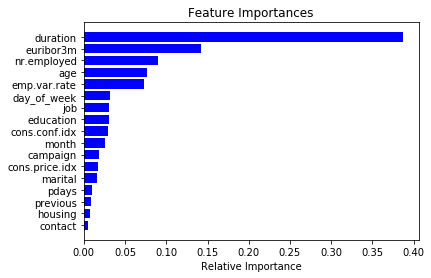

In [103]:
#before behaviour cluster:
sample_my_data=my_data.sample(n =800 , random_state =3)

T=np.split(sample_my_data,[19],axis=1)
X_1=T[0]
Y_1=T[1]


RF_my_data_model = RandomForestRegressor(random_state=1, max_depth=11)
RF_my_data_data = pd.get_dummies(X_1)

RF_my_data_model.fit(X_1,Y_1)
RF_my_data_features = RF_my_data_data.columns
RF_my_data_importances =RF_my_data_model.feature_importances_
RF_my_data_indices = np.argsort(RF_my_data_importances)[-17:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(RF_my_data_indices)), RF_my_data_importances[RF_my_data_indices], color='b', align='center')
plt.yticks(range(len(RF_my_data_indices)), [RF_my_data_features[i] for i in RF_my_data_indices])
plt.xlabel('Relative Importance')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


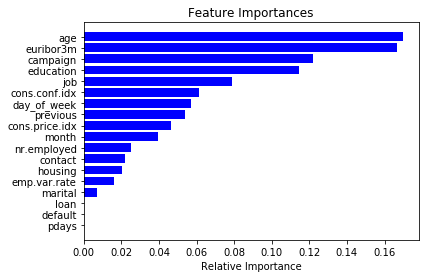

In [106]:
#after Behavioural cluster: 
sample_behavioralCluster1=behavioralCluster1_Nonshadow.sample(n =100 , random_state = 1,replace=True)

T1=np.split(sample_behavioralCluster1,[18],axis=1)
XC_1=T1[0]
YC_1=T1[1]


RF_behavioralCluster1_model = RandomForestRegressor(random_state=1, max_depth=11)
RF_behavioralCluster1_data = pd.get_dummies(XC_1)

RF_behavioralCluster1_model.fit(XC_1,YC_1)
RF_behavioralCluster1_features = RF_behavioralCluster1_data.columns
RF_behavioralCluster1_importances =RF_behavioralCluster1_model.feature_importances_
RF_behavioralCluster1_indices = np.argsort(RF_behavioralCluster1_importances)[-18:]  # top 14 features


plt.title('Feature Importances')
plt.barh(range(len(RF_behavioralCluster1_indices)), RF_behavioralCluster1_importances[RF_behavioralCluster1_indices], color='b', align='center')
plt.yticks(range(len(RF_behavioralCluster1_indices)), [RF_behavioralCluster1_features[i] for i in RF_behavioralCluster1_indices])
plt.xlabel('Relative Importance')
plt.show()